In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

In [89]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1

# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigm_deriv(x):
    return x * (1 - x)
    
# вычисление Relu функции
def ReLU(x):
    return x  *  (x  >  0)

# вычисление производной от Relu функции
def relu_deriv(x):
    return x>0

In [90]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - (x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

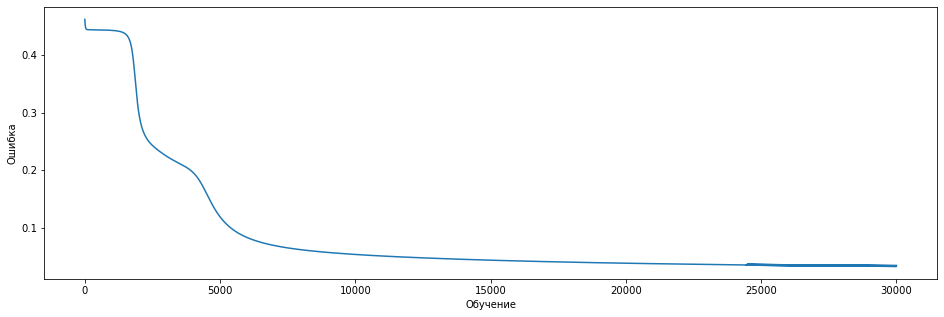

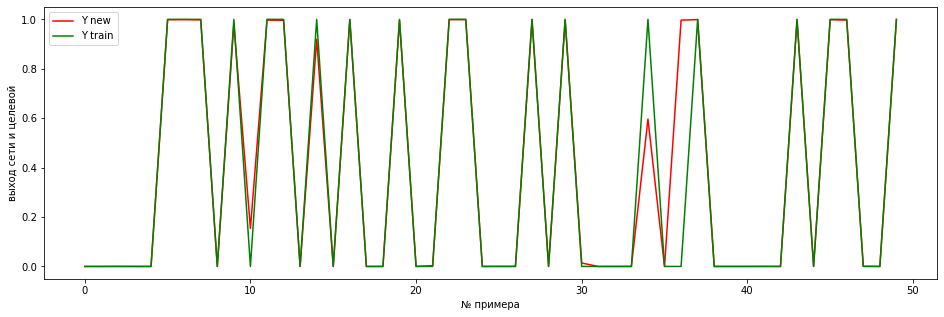

Аккуратность нейронной сети 96.59%


In [127]:
neuron_numb = 6

# присваевание случайных весов
seed = 888

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1
w2 = 2*np.random.random((neuron_numb, neuron_numb)) - 1
w3 = 2*np.random.random((neuron_numb, 3)) - 1

# скорость обучения (learning rate)
n = 0.005

errors = []

# процесс обучения
for i in range(30000):
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    layer4 = sigmoid(np.dot(layer3, w3))

    layer4_error = y_train - layer4
    layer4_delta = layer4_error * sigmoid_deriv(layer4)
    
    layer3_error = layer4_delta.dot(w3.T)
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w3 += layer3.T.dot(layer4_delta) * (n)
    w2 += layer2.T.dot(layer3_delta) * (n)
    w1 += layer1.T.dot(layer2_delta) * (n)
    w0 += layer0.T.dot(layer1_delta) * (n) 
    # метрика модели
    error = np.mean(np.abs(layer4_error))
    errors.append(error)
    accuracy = (1 - error) * 100

plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer4[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



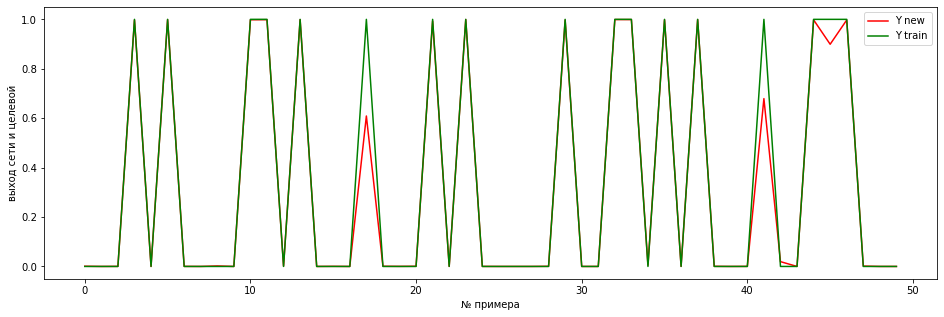

Аккуратность нейронной сети на тесте 98.4%


In [128]:
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer3_t = sigmoid(np.dot(layer2_t, w2))
layer4_t = sigmoid(np.dot(layer3_t, w3))
layer4_error_t = y_test - layer4_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer4_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer4_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

## Вывод
При увеличении эпох, увеличении количества слоев и уменьшении скорости обучения происходит увеличение точности модели. 
При уменьшении слоев, количества неронов в слое и эпох происходит уменьшение точности модели. 